# Neural Networks with Keras

---

### Learning Objectives

- Describe the basic `keras` workflow.
- Train regression and classification neural networks using `keras`

In [1]:
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

%matplotlib inline

/Users/max/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/max/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/max/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/max/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

# Regression
---

`make_regression` is an excellent library for generating a random regression problem. This helps us focus on the model without having to worry about the dataset. 

In the cell below, use `make_regression` to generate 10,000 samples using 20 features.

In [2]:
X, y = make_regression(n_samples=10000, n_features=20, noise=100.0, random_state=42)

In [3]:
y.shape

(10000,)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [5]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

### Your first Neural Network!!
---

Next stop, [The Singularity](https://en.wikipedia.org/wiki/Technological_singularity)!

Creating a model in `keras` entails a few steps:
1. Create your network topology
2. Compile your model
3. Fit your model

We'll cover each step in the cells below.

### Create your network topology
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

For *all* regression problems, your output layer will be 1 neuron with *no* activation function. 

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Z_train, y_train)
model.score(Z_test, y_test)

0.7922120863493889

In [7]:
model.coef_

array([-0.63237975, 37.34340121,  0.64245265, 36.24074593, 74.31426317,
       94.36707795,  9.91071161, 25.03409039,  0.53797585, -0.56415241,
       -0.20078417, 50.8789255 , 98.51977329,  2.23592095,  0.63244107,
       43.21139379, 88.01407369,  1.19367129, -0.76076655, -0.85975756])

In [8]:
Z_train.shape

(7500, 20)

In [9]:
# flavour 1a
model = Sequential()
model.add(Input(shape=(Z_train.shape[1],)))
model.add(Dense(1))

# flavour 1b
model = Sequential()
model.add(Dense(1, input_shape=(Z_train.shape[1],)))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.fit(Z_train, y_train)

Train on 7500 samples
7500/7500 [==============================] - 0s 34us/sample - loss: 50381.9682 - mae: 178.7340


In [10]:
model.layers[0].weights

[<tf.Variable 'dense_1/kernel:0' shape=(20, 1) dtype=float32, numpy=
 array([[ 0.03551054],
        [ 0.15692608],
        [-0.08892962],
        [-0.02716208],
        [ 0.11797271],
        [ 0.42208785],
        [ 0.16419722],
        [ 0.5786348 ],
        [ 0.06459136],
        [ 0.4699251 ],
        [ 0.49551573],
        [ 0.08812045],
        [ 0.4553149 ],
        [-0.33156902],
        [-0.43956834],
        [ 0.69714475],
        [ 0.10642412],
        [-0.31437626],
        [-0.42365128],
        [ 0.1265878 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.01281287], dtype=float32)>]

In [11]:
# flavour 1a
model = Sequential()
model.add(Input(shape=(Z_train.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model = Sequential()
model.add(Dense(50, input_shape=(Z_train.shape[1],), activation='relu'))
model.add(Dense(1))

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What [loss function](https://keras.io/losses/) to use (depends on if it's regression, classification, etc)
2. What optimizer to use
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [13]:
model.fit(Z_train, y_train, epochs=25, batch_size=32, validation_data=(Z_test, y_test))

Train on 7500 samples, validate on 2500 samples
Epoch 1/25
7500/7500 [==============================] - 0s 59us/sample - loss: 49624.3843 - mean_absolute_error: 177.3950 - val_loss: 47433.5491 - val_mean_absolute_error: 174.9899
Epoch 2/25
7500/7500 [==============================] - 0s 41us/sample - loss: 44406.0684 - mean_absolute_error: 167.6286 - val_loss: 39487.2181 - val_mean_absolute_error: 159.2937
Epoch 3/25
7500/7500 [==============================] - 0s 36us/sample - loss: 34614.0719 - mean_absolute_error: 147.4856 - val_loss: 28929.0576 - val_mean_absolute_error: 135.7821
Epoch 4/25
7500/7500 [==============================] - 0s 34us/sample - loss: 24365.8060 - mean_absolute_error: 123.4773 - val_loss: 19965.2353 - val_mean_absolute_error: 112.5638
Epoch 5/25
7500/7500 [==============================] - 0s 27us/sample - loss: 17020.7909 - mean_absolute_error: 103.5758 - val_loss: 14611.0871 - val_mean_absolute_error: 96.3825
Epoch 6/25
7500/7500 [==========================

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [14]:
model.fit(Z_train, y_train, validation_data=(Z_test, y_test), epochs=10, batch_size=512)

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 0s 19us/sample - loss: 10262.4028 - mean_absolute_error: 80.5851 - val_loss: 10697.6126 - val_mean_absolute_error: 82.2424
Epoch 2/10
7500/7500 [==============================] - 0s 3us/sample - loss: 10260.5084 - mean_absolute_error: 80.5772 - val_loss: 10696.6469 - val_mean_absolute_error: 82.2396
Epoch 3/10
7500/7500 [==============================] - 0s 3us/sample - loss: 10258.7632 - mean_absolute_error: 80.5713 - val_loss: 10695.6848 - val_mean_absolute_error: 82.2351
Epoch 4/10
7500/7500 [==============================] - 0s 3us/sample - loss: 10256.9535 - mean_absolute_error: 80.5640 - val_loss: 10694.6965 - val_mean_absolute_error: 82.2324
Epoch 5/10
7500/7500 [==============================] - 0s 3us/sample - loss: 10255.1316 - mean_absolute_error: 80.5570 - val_loss: 10693.1036 - val_mean_absolute_error: 82.2260
Epoch 6/10
7500/7500 [==============================] - 0s 4u

### Model predictions
---

Your `keras` model has a `.fit()` method, similar to `sklearn`. The only difference is `keras` returns a 2D `numpy` matrix (`sklearn` returns a 1D `numpy` array).

Try it out in the cell below.

In [15]:
model.predict(Z_test)

array([[ -50.830715],
       [  88.579994],
       [  89.66644 ],
       ...,
       [-285.2524  ],
       [ 261.33163 ],
       [-100.32874 ]], dtype=float32)

In [16]:
y_test

array([ -43.45506974,  -44.92470682,  176.76476055, ..., -398.93906378,
        228.74950877,  -63.61994952])

In [17]:
model.evaluate(Z_test, y_test)

2500/2500 [==============================] - 0s 15us/sample - loss: 10686.2221 - mean_absolute_error: 82.2000


[10686.222134375, 82.2]

# Binary Classification
---

`make_classification` is similar to `make_regression`, except now we're predicting a class (0 or 1).

In the cell below, use `make_classification` to generate 10,000 samples using 20 features.

In [18]:
X, y = make_classification(
    n_samples=10_000, n_features=20, n_informative=5, 
    class_sep=0.80, random_state=42)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7284

### Network Topology for Binary Classification
---

We'll create a simple network with:
- an input layer, 
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

For *all* binary classification problems, your output layer will be 1 neuron with `'sigmoid'` activation function. Sigmoid squashes the output of our neuron to a value between 0 and 1, which is great for predicting probabilities. We'll use the probability for our loss function in the next step.

In [20]:
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For binary classification, use `binary_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

When you fit a model, `keras` returns a `History` object. We need that in the next step, but for now, just save it to a variable.

In [22]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=30, batch_size=32, 
                    verbose=2)

W0120 12:53:25.929468 4424523072 deprecation.py:323] From /Users/max/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7500 samples, validate on 2500 samples
Epoch 1/30
7500/7500 - 0s - loss: 0.5413 - accuracy: 0.7271 - val_loss: 0.5140 - val_accuracy: 0.7420
Epoch 2/30
7500/7500 - 0s - loss: 0.4800 - accuracy: 0.7684 - val_loss: 0.4453 - val_accuracy: 0.7856
Epoch 3/30
7500/7500 - 0s - loss: 0.4108 - accuracy: 0.8168 - val_loss: 0.3777 - val_accuracy: 0.8264
Epoch 4/30
7500/7500 - 0s - loss: 0.3480 - accuracy: 0.8583 - val_loss: 0.3321 - val_accuracy: 0.8568
Epoch 5/30
7500/7500 - 0s - loss: 0.3068 - accuracy: 0.8820 - val_loss: 0.2960 - val_accuracy: 0.8760
Epoch 6/30
7500/7500 - 0s - loss: 0.2799 - accuracy: 0.8960 - val_loss: 0.2743 - val_accuracy: 0.8892
Epoch 7/30
7500/7500 - 0s - loss: 0.2599 - accuracy: 0.9049 - val_loss: 0.2620 - val_accuracy: 0.8972
Epoch 8/30
7500/7500 - 0s - loss: 0.2461 - accuracy: 0.9101 - val_loss: 0.2539 - val_accuracy: 0.9000
Epoch 9/30
7500/7500 - 0s - loss: 0.2356 - accuracy: 0.9148 - val_loss: 0.2434 - val_accuracy: 0.9000
Epoch 10/30
7500/7500 - 0s - loss:

In [23]:
history.history['val_loss']

[0.5140211907863617,
 0.4452737398147583,
 0.3776739224433899,
 0.33209709768295287,
 0.29604154138565064,
 0.27427204765081403,
 0.26196843223571775,
 0.25387915291786195,
 0.2433659794807434,
 0.23846026177555324,
 0.22971402390003204,
 0.22575276498794555,
 0.22459144164323808,
 0.2184165569782257,
 0.21726050717830658,
 0.22517512822151184,
 0.21314034366607665,
 0.21436478272080423,
 0.2104450734734535,
 0.2090892237663269,
 0.20869312582015992,
 0.20775984535217284,
 0.20524019374847413,
 0.2040472603559494,
 0.20273731422424315,
 0.2081419089794159,
 0.20854493255615233,
 0.19791267414093017,
 0.20629308609962463,
 0.2009544063091278]

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

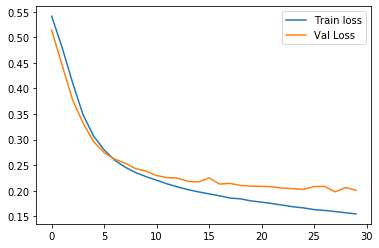

In [24]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

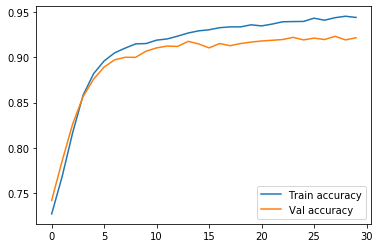

In [26]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

# Multi-class Classification
---

The `make_classification` function allows for multi-class problems as well. Simply increase the `n_classes` and voila!

**NOTE**: You'll need to increase `n_informative` as you increase `n_classes`.

In the cell below, let's create a dataset with three classes.

In [27]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=4, n_classes=3, class_sep=0.8)

In [28]:
np.unique(y)

array([0, 1, 2])

### One-hot Encoding Targets
---

In `keras`, you have to one-hot encode your `y` if it contains more than two classes. We'll use `keras`' built-in `to_categorical` function to achieve this.

In [29]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit_transform(y)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [30]:
y = to_categorical(y)
y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

### Train/Test Split
---

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### `StandardScaler`
---

Use an instance of `StandardScaler` to scale your `X_train` and `X_test` in the cell below.

In [32]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

### Network Topology for Multi-class Classification
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer

For *all* multi-class classification problems, your output layer will be the same number of neurons as the number of classes in your problem. The activation function will be `softmax`, which will normalize the predictions into probabilities that sum up to 1.0.

In [33]:
model = Sequential()
model.add(Input(shape=(Z_train.shape[1],)))

model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
          
model.add(Dense(3, activation='softmax'))

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For multi-class classification, use `categorical_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [35]:
history = model.fit(Z_train, y_train, validation_data=(Z_test, y_test), epochs=20, batch_size=512)

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 0s 44us/sample - loss: 1.1482 - accuracy: 0.3407 - val_loss: 1.1011 - val_accuracy: 0.3672
Epoch 2/20
7500/7500 [==============================] - 0s 4us/sample - loss: 1.0851 - accuracy: 0.3872 - val_loss: 1.0715 - val_accuracy: 0.4108
Epoch 3/20
7500/7500 [==============================] - 0s 5us/sample - loss: 1.0534 - accuracy: 0.4321 - val_loss: 1.0425 - val_accuracy: 0.4400
Epoch 4/20
7500/7500 [==============================] - 0s 4us/sample - loss: 1.0199 - accuracy: 0.4668 - val_loss: 1.0100 - val_accuracy: 0.4612
Epoch 5/20
7500/7500 [==============================] - 0s 4us/sample - loss: 0.9824 - accuracy: 0.4896 - val_loss: 0.9776 - val_accuracy: 0.4856
Epoch 6/20
7500/7500 [==============================] - 0s 5us/sample - loss: 0.9443 - accuracy: 0.5203 - val_loss: 0.9451 - val_accuracy: 0.5080
Epoch 7/20
7500/7500 [==============================] - 0s 5us/sample - los

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

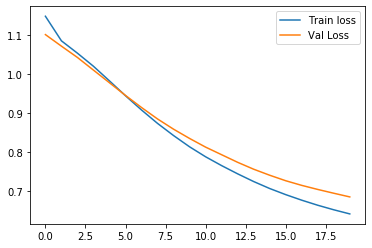

In [36]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

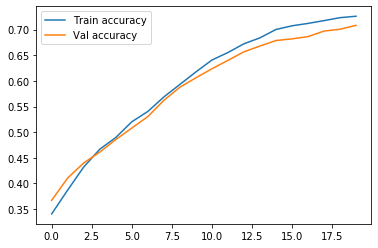

In [37]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [38]:
# Flavour 2

In [39]:
X, y = make_regression(n_samples=10000, n_features=20, noise=100.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train)

Train on 7500 samples
7500/7500 [==============================] - 0s 49us/sample - loss: 47432.2639


In [41]:
# flavour 3 

In [42]:
def add_punctuation(punc='!'):
    def hello_punc(something):
        return f"Hello {something}{punc}"
    return hello_punc

In [43]:
hello_exclaim = add_punctuation('!')

In [44]:
hello_exclaim('Garry')

'Hello Garry!'

In [45]:
hello_question = add_punctuation('?')
hello_question('Garry')

'Hello Garry?'

In [46]:
add_punctuation('$')('Dunya')

'Hello Dunya$'

In [47]:
inputs = Input(shape=(X_train.shape[1],))
x = Dense(50, activation='relu')(inputs)
x = Dense(20, activation='relu')(x)
outputs = Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train)

Train on 7500 samples
7500/7500 [==============================] - 0s 48us/sample - loss: 47291.9307


In [48]:
model.evaluate(X_test, y_test)

2500/2500 [==============================] - 0s 25us/sample - loss: 40472.0645


40472.06449375

In [49]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_17 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 21        
Total params: 2,091
Trainable params: 2,091
Non-trainable params: 0
_________________________________________________________________
